LASSO


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Lasso_dataset.csv')
df.head(4)

,Feature1,Feature2,Feature3,Feature4,Target
0,0.50,1.22,0.99,0.34,4.72
1,1.38,0.49,0.34,0.89,5.11
2,-0.67,1.01,-0.45,0.78,1.33
3,0.86,-1.22,1.24,-0.55,2.44


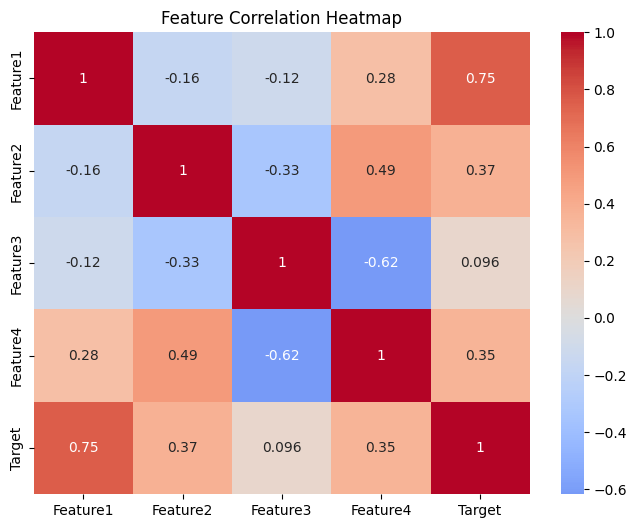

In [6]:
# Plot correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [7]:
# Split features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Initialize and train LASSO regression
alpha_val = 0.1  # Regularization strength (can tune)
lasso = Lasso(alpha=alpha_val)
lasso.fit(X_train, y_train)

# Predict on test set
y_pred = lasso.predict(X_test)

In [10]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LASSO coefficients: {lasso.coef_}')
print(f'Mean Squared Error: {mse:.3f}')
print(f'R^2 Score: {r2:.3f}')

LASSO coefficients: [1.54510289 0.92814259 0.63774855 0.        ]
Mean Squared Error: 0.388
R^2 Score: 0.878


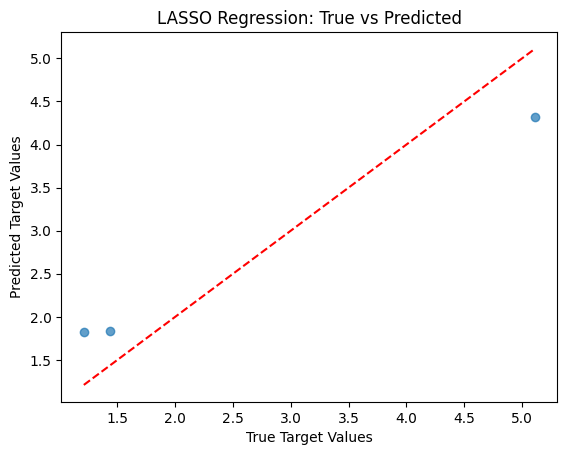

In [11]:
# Plot true vs predicted
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('True Target Values')
plt.ylabel('Predicted Target Values')
plt.title('LASSO Regression: True vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
